# <center> Advanced ML pipeline with segmentation_models and Callbacks
    
---

## In this Session
* Getting Started with Object Oriented Programming
* Understand the dataset
* Create the dataset preprocessing pipeline
* Understand each step in preprocessing pipeline

## Object Oriented Programming Basics
* Build a blueprint to create different rockets
* Each rocket will have some color, initial positions and ability to move
* Add an ability to calculate distance between two rockets of same class
* Once the blueprint is ready, create two rockets and calculate distance between them

In [34]:
import numpy as np

In [35]:
# Build the rocket class (blueprint)
class Rocket:
    
    # Constructor - Initialize your attributes for the Rocket
    def __init__(self, color, initial_x, initial_y, name):
        self.color = color
        self.x = initial_x
        self.y = initial_y
        self.name = name
        
    # Method 1 - Ability to Move
    def move(self, move_x, move_y):
        self.x = self.x + move_x
        self.y = self.y + move_y
        
    # Method 2 - Calculate the distance between two rockets
    def distance_from(self, other_rocket):
        x_distance = self.x - other_rocket.x
        y_distance = self.y - other_rocket.y
        return np.sqrt(x_distance**2 + y_distance**2)

In [39]:
# Test the Rocket class
rocket_1 = Rocket('Violet', 0, 0, 'Rocket 1')
rocket_1.move(0, 100)

rocket_2 = Rocket('Off White', 0, 0, 'Rocket 2')
rocket_2.distance_from(rocket_2)

0.0

# Importing libraries

In [41]:
from matplotlib import pyplot as plt  # Displaying images
from skimage.io import imread         # Read the images
import numpy as np                    # Data Handling
import datetime                       # Used in Naming
import math                           # Math operations
import os                             # Directory files

# One Hot Encoded Mask and Dataset Building
from tensorflow.keras.utils import to_categorical, Sequence
import tensorflow as tf
import keras

In [45]:
# Set the root directory paths for images and masks
img_dir = '/kaggle/input/images/render'
mask_dir = '/kaggle/input/images/clean'

# Sort the files in root directories, Create and Store the complete image and mask paths
images = [os.path.join(img_dir, x) for x in sorted(os.listdir(img_dir))]
masks = [os.path.join(mask_dir, x) for x in sorted(os.listdir(mask_dir))]


# First 8000 images to be used for training
X_train = images[:8000]
y_train = masks[:8000]

# Remaining can be used for validation purpose
X_valid = images[8000:-4]
y_valid = masks[8000:-4]

# Save some for testing purpose (last 4)
X_test = images[-4:]
y_test = masks[-4:]

### Break Down of Mask Preprocessing


In [50]:
# Consider an example in training data to understand this
mask_sample_path = y_train[1]
print(mask_sample_path)

/kaggle/input/images/clean/clean0002.png


In [51]:
# Read the mask as gray scale
sample_mask_arr = imread(mask_sample_path, as_gray=True)
print(sample_mask_arr.shape)

(480, 720)


In [52]:
# Cropping the mask
sample_mask_cropped = sample_mask_arr[:480, :480]
print(sample_mask_cropped.shape)

(480, 480)


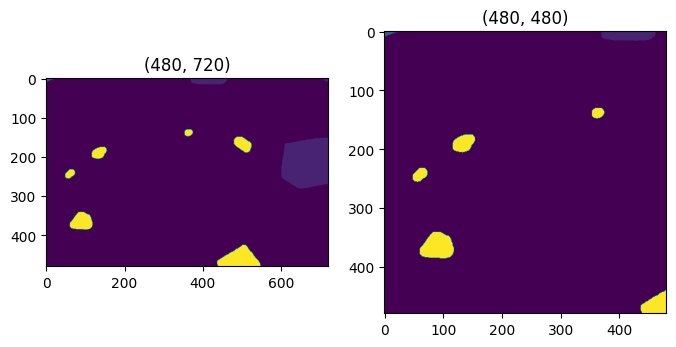

In [53]:
# Mask with original size and after cropping
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

plot_data = ((sample_mask_arr, sample_mask_cropped),
            (sample_mask_arr.shape, sample_mask_cropped.shape))

for (ax, arr, title) in zip(axes,*(plot_data)) :
    ax.imshow(arr)
    ax.set_title(title)


In [54]:
# Check the unique values in cropped_mask
np.unique(sample_mask_cropped)

array([0.    , 0.0721, 0.2125, 0.7154])

In [55]:
# What happens if you divide them with 0.07?
np.unique(sample_mask_cropped)//0.07

array([ 0.,  1.,  3., 10.])

In [56]:
# We need to convert the values of 3 to 2 and 10 to 3 after floor operation with 0.07
adjusted_mask = sample_mask_cropped//0.07
adjusted_mask[adjusted_mask == 3.0] = 2.0
adjusted_mask[adjusted_mask == 10.0] = 3.0
print(np.unique(adjusted_mask))

[0. 1. 2. 3.]


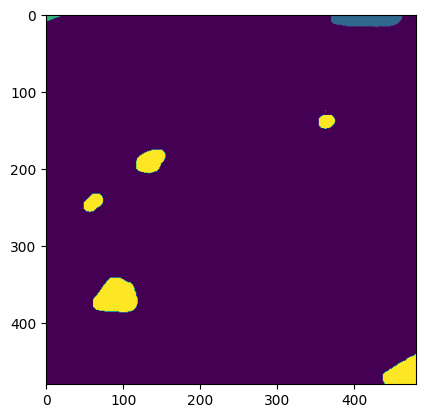

In [57]:
# Check if any changes in the output (the colors are a bit different! as pixel values changed)
plt.imshow(adjusted_mask)

In [58]:
# Get 4 channel one hot encoded mask
final_sample_mask = to_categorical(adjusted_mask,num_classes=4)
final_sample_mask

array([[[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        ...,
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        ...,
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        ...,
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]],

       ...,

       [[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [0., 0., 0., 1.],
        [0., 0.

### Excercise to get from one hot to integer encoded mask (post processing)

In [68]:
final_sample_mask.shape

(480, 480, 4)

In [69]:
int_encoded_mask = np.argmax(final_sample_mask, axis=-1)
int_encoded_mask

array([[2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 3, 3, 3],
       [0, 0, 0, ..., 3, 3, 3],
       [0, 0, 0, ..., 3, 3, 3]])

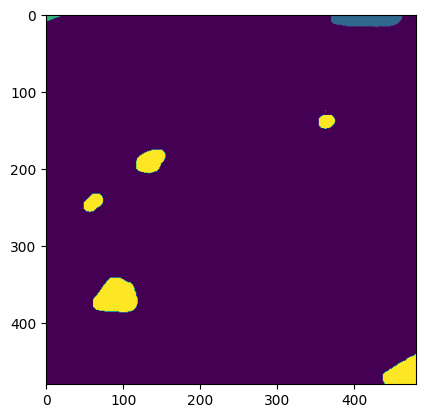

In [72]:
plt.imshow(int_encoded_mask)

In [73]:
# A dummy 4 channel array
np.random.seed(42)
dum_arr = np.random.rand(3, 3, 4)
dum_arr # 1, 3, 3, # 0, 1, 0 # 1, 2, 1

[1, 3, 3]
[0, 1, 0]
[1, 2, 2]

array([[[0.37454012, 0.95071431, 0.73199394, 0.59865848],
        [0.15601864, 0.15599452, 0.05808361, 0.86617615],
        [0.60111501, 0.70807258, 0.02058449, 0.96990985]],

       [[0.83244264, 0.21233911, 0.18182497, 0.18340451],
        [0.30424224, 0.52475643, 0.43194502, 0.29122914],
        [0.61185289, 0.13949386, 0.29214465, 0.36636184]],

       [[0.45606998, 0.78517596, 0.19967378, 0.51423444],
        [0.59241457, 0.04645041, 0.60754485, 0.17052412],
        [0.06505159, 0.94888554, 0.96563203, 0.80839735]]])

In [74]:
# First row has max value of 0.95 on index 1, hence, 1 is returned on (0,0)
# Similarly, second row has max value of 0.86 on index 3, hence 3 is returned for (0,1)
# So on ...
np.argmax(dum_arr, axis=-1)

array([[1, 3, 3],
       [0, 1, 0],
       [1, 2, 2]])

## Custom Data Generator to prepare the Dataset

In [ ]:
# Dataset Pipeline
class LunarDataset(Sequence):

    # Constructor - x_set, y_set, batch_size, dims, classes
    def __init__(self, x_set, y_set, batch_size, dims, classes):
        pass

    # Number of Batches --> total length of images / batch size --> Ceil operation
    def __len__(self):
        pass

    # Fetch the data in batches by using iter and next opertions (allows you to use slice and indexing)
    def __getitem__(self, idx):
        # Get start and end indexes to create a batch of batch size
        start_index =
        end_index =

        # Prepare X and y batches
        batch_x =
        batch_y =

        # Empty lists to append preprocessed Images and Masks Array from the for loop
        x_data = []
        y_data = []

        # For every  image and mask in one batch do the following preprocessing
        for idx, (filename_x, filename_y) in enumerate(zip(batch_x, batch_y)):

            # Image preprocessing

            # Mask preprocessing

        # Convert list to arrays ensuring the dtype of mask is also float32


        # Return the preprocessed batch of images and respective mask as output
        return x_data, y_data

In [ ]:
# Parameters
batch_size = 16
dims = (480, 480)
num_classes = 4

# Dataset Creation
train_dataset =
valid_dataset =

## Let's visualize our masks

In [ ]:
# Taking a sample batch from train_dataset
batch = next(iter(train_dataset)) # Batch Size, Height, Width, Channels (Images, Masks)

# Check the shape of batch created --> Images and Masks
print(batch[0].shape) # 16 images in a batch
print(batch[1].shape) # 16 respective masks in a batch

In [ ]:
# Get the mask
sample = batch[1][1] # Second in the batch

In [ ]:
# Creating Subplot for better visualization
fig, ((a1, a2, a3), (a4, a5, a6)) = plt.subplots(2, 3, figsize = (10, 8))

# For different axes and titles
for i, (ax,title) in enumerate(zip((a1, a2, a3, a4, a5, a6),
                                   ('Original', 'Combined Mask', 'Background', 'Large Rocks', 'Sky', 'Small Rocks'))):
    if i == 0:
        ax.imshow(batch[0][1])                    # Second Image in the batch (Original)
    elif i == 1:
        ax.imshow(np.argmax(sample, axis=-1))     # Converts One Hot encoded mask to Integer Encoded Mask (single channel)
    else:
        ax.imshow(sample[:, :, i-2])              # Channel Wise Output from Mask

    # Set Title and turn off the axis
    ax.set_title(title, fontsize=15, weight='bold')
    ax.axis('off')

# Adjust Layout and Display the Subplot
plt.tight_layout()
plt.show()